In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive



In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load the image

image_path = 'images/me.jpg' 
# Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



In [4]:
def image_processing(gamma=1.0, threshold_value=128, x1=0, x2=255):
    # Image Negative
    negative_image = 255 - image

    # Log Transformation
    log_transformed = np.log1p(image)

    # Power-law (Gamma) Transformation
    gamma_transformed = (image / 255.0) ** gamma * 255
    gamma_transformed = np.clip(gamma_transformed, 0, 255).astype(np.uint8)

    # Contrast Stretching
    # min_intensity = np.min(image)
    # max_intensity = np.max(image)
    # contrast_stretched = 255 * (image - min_intensity) / (max_intensity - min_intensity)
    # contrast_stretched = np.clip(contrast_stretched, 0, 255).astype(np.uint8)

    # Thresholding
    thresholded_image = np.where(image >= threshold_value, 255, 0).astype(np.uint8)

    # Intensity Level Slicing
    intensity_sliced = np.where((image >= x1) & (image <= x2), 255, 0).astype(np.uint8)

    # Plot the images
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')

    plt.subplot(2, 3, 2)
    plt.title('Image Negative')
    plt.imshow(negative_image, cmap='gray')

    plt.subplot(2, 3, 3)
    plt.title('Log Transformation')
    plt.imshow(log_transformed, cmap='gray')

    plt.subplot(2, 3, 4)
    plt.title(f'Gamma Transformation (gamma={gamma})')
    plt.imshow(gamma_transformed, cmap='gray')

    plt.subplot(2, 3, 5)
    plt.title(f'Thresholding (Threshold={threshold_value})')
    plt.imshow(thresholded_image, cmap='gray')

    plt.subplot(2, 3, 6)
    plt.title(f'Intensity Slicing\n(x1={x1}, x2={x2})')
    plt.imshow(intensity_sliced, cmap='gray')

    plt.tight_layout()
    plt.show()



In [5]:
# Create sliders for adjusting parameters
gamma_slider = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Gamma')
threshold_slider = widgets.IntSlider(value=128, min=0, max=255, step=1, description='Threshold')
x1_slider = widgets.IntSlider(value=0, min=0, max=255, step=1, description='Lower Limit (x1)')
x2_slider = widgets.IntSlider(value=255, min=0, max=255, step=1, description='Upper Limit (x2)')



In [6]:
# # Create an interactive widget
interactive_plot = interactive(
    image_processing,
    gamma=gamma_slider,
    threshold_value=threshold_slider,
    x1=x1_slider,
    x2=x2_slider
)



In [7]:
# Display the interactive widget
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='Gamma', max=3.0, min=0.1), IntSlider(value=128, desc…

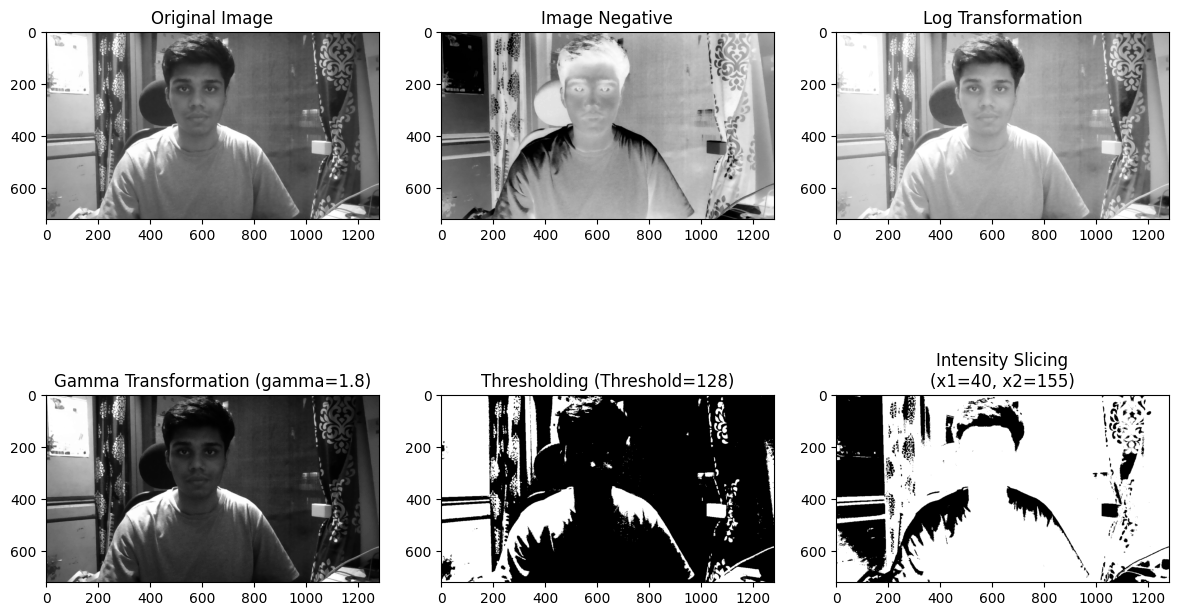

In [8]:
image_processing(gamma=1.8, threshold_value=128, x1=40, x2=155)

In [9]:
def bit_plane_slice(image_path, bit_plane):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Extract the specified bit-plane
    plane = (img >> bit_plane) & 1

    return plane

In [10]:
def plot_bit_plane_slices(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Get the number of bits required to represent the pixel values
    num_bits = int(np.ceil(np.log2(np.max(img) + 1)))

    # Plot each bit-plane
    plt.figure(figsize=(8, 3))
    for i in range(num_bits):
        bit_plane = (img >> i) & 1
        plt.subplot(2, num_bits//2, i+1)
        plt.imshow(bit_plane, cmap='gray')
        plt.title(f'Bit-Plane {i}')
        plt.axis('off')

    plt.show()

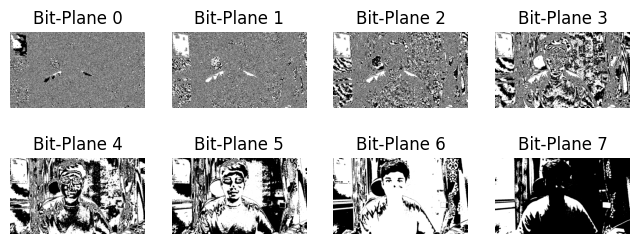

In [11]:

# Example for all bit-planes
plot_bit_plane_slices(image_path)